<a href="https://colab.research.google.com/github/amltago/project2/blob/main/ProjectB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Marketing Campaign- Financial Institution

## Data Preparation

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing libraries

import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.compose import make_column_selector
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn import set_config
from sklearn.pipeline import make_pipeline
set_config(display='diagram')
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt
import statistics
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.metrics import silhouette_score, classification_report, confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_auc_score, plot_roc_curve

In [ ]:
bank = '/content/drive/MyDrive/Coding Dojo/Files/bank.csv'
df = pd.read_csv(bank)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [ ]:
# Checking duplicates

df.duplicated().sum()
print("Duplicates", (df.duplicated().sum()))

Duplicates 0


In [ ]:
#Checking for null values

df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

In [ ]:
# Checking for inconsistencies

# Get column names
column_names = df.columns

# Iterate each column
for columns in column_names:
    print(columns,df[columns].unique())

age [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
balance [2343   45 1270 ... 1594 2593 -134]
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
duration [1042 1467 1389 ... 1504  818 1812]
campaign [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
pdays [ -1 166  91 147

### Validating Inconsistencies- Categorical

In [ ]:
# Checking for inconsistencies for categorical data

df_cat = df.select_dtypes(include=['object'])

cat_names = df_cat.columns

# Iterate each column

for columns in cat_names:
    print(columns,df[columns].unique())

job ['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student']
marital ['married' 'single' 'divorced']
education ['secondary' 'tertiary' 'primary' 'unknown']
default ['no' 'yes']
housing ['yes' 'no']
loan ['no' 'yes']
contact ['unknown' 'cellular' 'telephone']
month ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
poutcome ['unknown' 'other' 'failure' 'success']
deposit ['yes' 'no']


In [ ]:
# Filtering job to verify unique values

job = df['job'].value_counts()
job

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [ ]:
# Filtering marital to verify unique values

status = df['marital'].value_counts()
status

married     6351
single      3518
divorced    1293
Name: marital, dtype: int64

In [ ]:
# Filtering education to verify unique values

edu = df['education'].value_counts()
edu

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
# Filtering contact to verify unique values

con_type = df['contact'].value_counts()
con_type

cellular     8042
unknown      2346
telephone     774
Name: contact, dtype: int64

In [ ]:
# Filtering poutcome to verify unique values

p_outcome = df['poutcome'].value_counts()
p_outcome

unknown    8326
failure    1228
success    1071
other       537
Name: poutcome, dtype: int64

### Showing all the unknown entries to verify if it can or can't affect the dataset for presentation and training

### The unknown entries are not entirely significant on each feature

### Validating Inconsistencies- Numerical

In [ ]:
# Checking for inconsistencies for numerical data

df_num = df.select_dtypes(include=['int64','float64'])

num_names = df_num.columns

# Iterate each column

for columns in num_names:
    print(columns, df[columns].unique())

age [59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89]
balance [2343   45 1270 ... 1594 2593 -134]
day [ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
duration [1042 1467 1389 ... 1504  818 1812]
campaign [ 1  2  3  4  6  5  8 11  9 10 15 12 14  7 24 13 17 29 21 20 16 32 19 25
 22 43 18 41 63 27 30 26 23 28 33 31]
pdays [ -1 166  91 147 170 150 171 126 182 110 198 174 175  27 128 100 177 167
 122 183 195 133 178  34  10 163 184 154  99  93   2 242 272  76 160  90
 196 246 238 203 268 189 267  92   9  88  85 210 257 261 270 106 199 112
  41 294 231 239 302 135 307 222 138 323 141 320 264 316 315 256 146 328
  74 148 327 341 145 266 234 345 318 325 274 343 260 305 344 254 180 340
  82 181 278 153   4 349 334 176  87 269  86 169  83  79   6 259  13 161
 350  84  

In [ ]:
# Filtering age to verify unique values

age = df['age']
age.value_counts().sort_values(ascending=False)

31    496
32    477
34    466
33    464
35    461
     ... 
92      2
93      2
88      2
95      1
89      1
Name: age, Length: 76, dtype: int64

In [ ]:
# Checking min and max of age

print("Minimum age in dataset",age.min())
print("Maximum age in dataset",age.max())

Minimum age in dataset 18
Maximum age in dataset 95


In [ ]:
# Filtering balance to verify unique values

bal = df['balance']
bal.value_counts().sort_values(ascending=False)

 0        774
 1         39
 3         35
 2         34
 4         29
         ... 
 10655      1
 4969       1
 10721      1
 6432       1
-134        1
Name: balance, Length: 3805, dtype: int64

In [ ]:
# Checking min and max of balance

print("Minimum balance in dataset",bal.min())
print("Maximum balance in dataset",bal.max())

Minimum balance in dataset -6847
Maximum balance in dataset 81204


In [ ]:
# Filtering duration to verify unique values

dur = df['duration']
dur.value_counts().sort_values(ascending=False)

97      39
161     38
158     37
119     37
150     37
        ..
1635     1
1417     1
1469     1
1512     1
1812     1
Name: duration, Length: 1428, dtype: int64

In [ ]:
# Checking min and max of balance

print("Minimum balance in dataset",dur.min())
print("Maximum balance in dataset",dur.max())

Minimum balance in dataset 2
Maximum balance in dataset 3881


In [ ]:
# Showing statistics of the dataset

df.describe(include='all')

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
count,11162.000000,11162,11162,11162,11162,11162.000000,11162,11162,11162,11162.000000,11162,11162.000000,11162.000000,11162.000000,11162.000000,11162,11162
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,management,married,secondary,no,NaN,no,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,2566,6351,5476,10994,NaN,5881,9702,8042,NaN,2824,NaN,NaN,NaN,NaN,8326,5873
mean,41.231948,NaN,NaN,NaN,NaN,1528.538524,NaN,NaN,NaN,15.658036,NaN,371.993818,2.508421,51.330407,0.832557,NaN,NaN
std,11.913369,NaN,NaN,NaN,NaN,3225.413326,NaN,NaN,NaN,8.420740,NaN,347.128386,2.722077,108.758282,2.292007,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-6847.000000,NaN,NaN,NaN,1.000000,NaN,2.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,32.000000,NaN,NaN,NaN,NaN,122.000000,NaN,NaN,NaN,8.000000,NaN,138.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,550.000000,NaN,NaN,NaN,15.000000,NaN,255.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,49.000000,NaN,NaN,NaN,NaN,1708.000000,NaN,NaN,NaN,22.000000,NaN,496.000000,3.000000,20.750000,1.000000,NaN,NaN


### Showing statistics for the mean, min and max of numerical features

## Exploratory Data Analysis 

### Showing univariate visuals for Categorical Features using Seaborn Library- sns.countplot

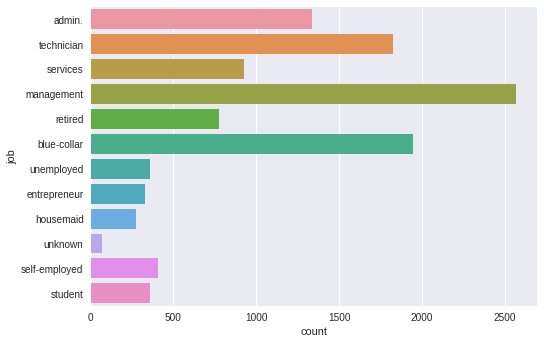

In [ ]:
# Visual for Job Description

plt.style.use('seaborn')

sns.countplot(y=df['job']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


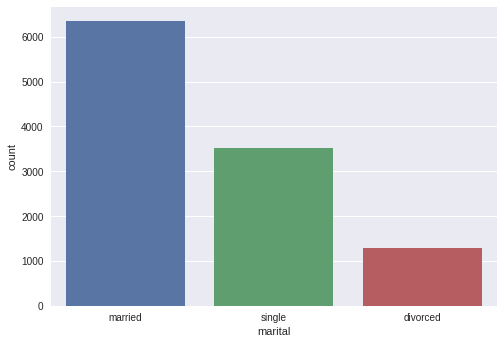

In [ ]:
# Visual for Marital Status

sns.countplot(df['marital']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


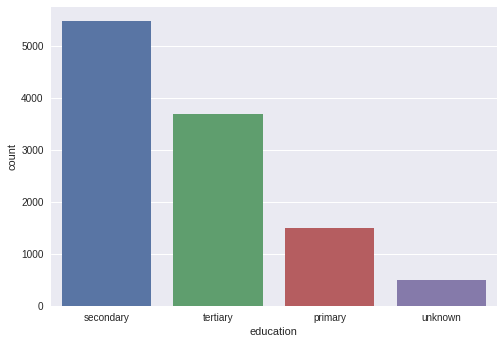

In [ ]:
# Visual for Educational Attainment

sns.countplot(df['education']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


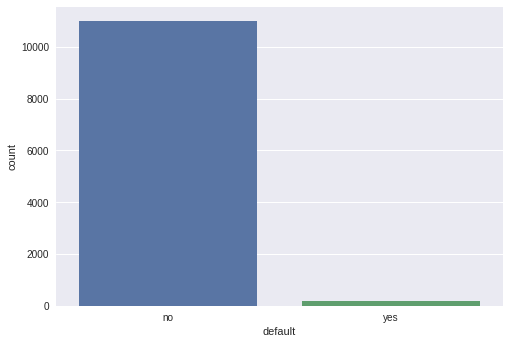

In [ ]:
# Visual for Credit status

sns.countplot(df['default']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


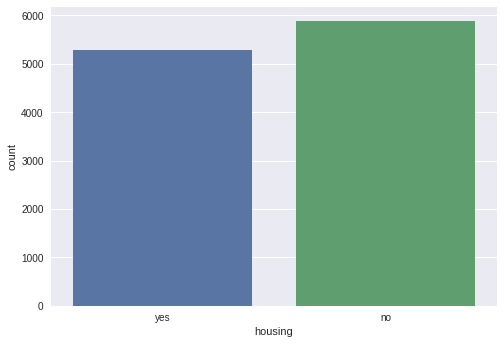

In [ ]:
# Visual for if Customer has Housing Loan

sns.countplot(df['housing']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


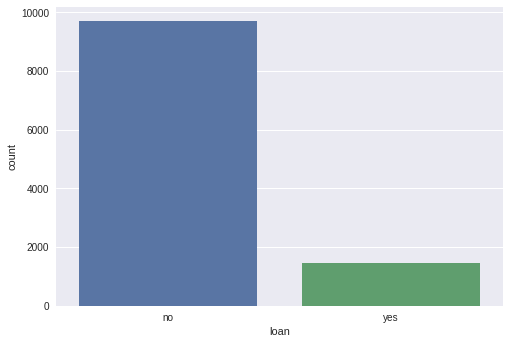

In [ ]:
# Visual for if Customer has Loan

sns.countplot(df['loan']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


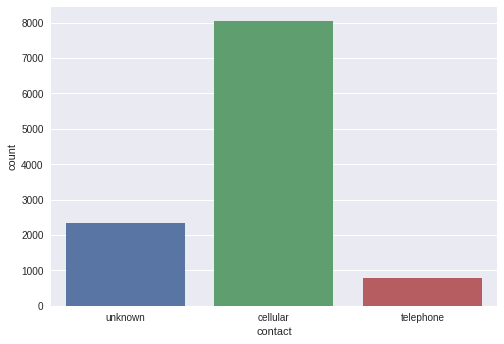

In [ ]:
# Visual for Type of Contact made

sns.countplot(df['contact']);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


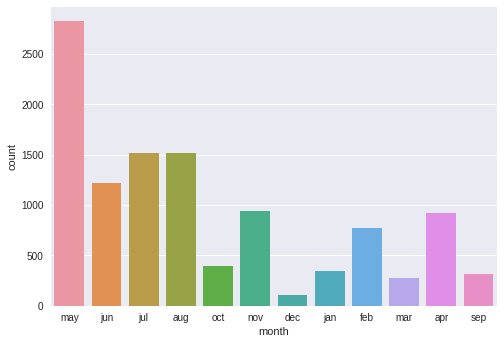

In [ ]:
# Visual for last contact month of the year

sns.countplot(df['month']);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


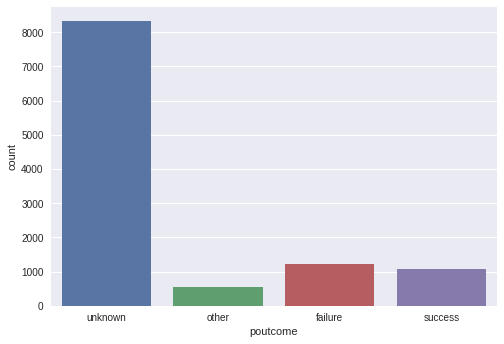

In [ ]:
# Outcome of previous marketing campaign

sns.countplot(df['poutcome']);


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


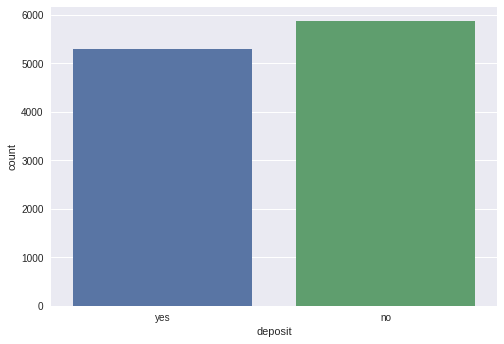

In [ ]:
# Visual for target feature- Subscription to Term Deposit

sns.countplot(df['deposit']);

### On the diagram we see that counts for 'yes' and 'no' values for 'deposit' are close, so we can use accuracy as a metric for a model, which predicts the campaign outcome.

### Showing univariate visuals for Numerical Features

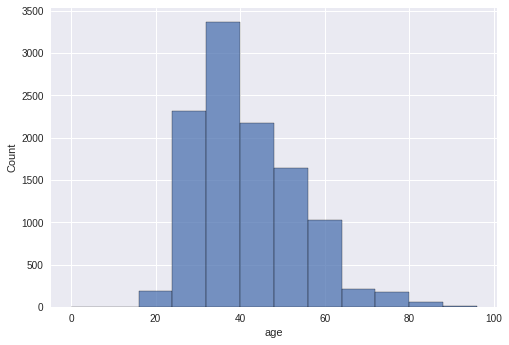

In [ ]:
sns.histplot(data=df, x='age' binwidth=8, binrange=(0,90), kde=False);

In [ ]:
sns.histplot(df['age'], binwidth=8, binrange=(0,90), kde=False);

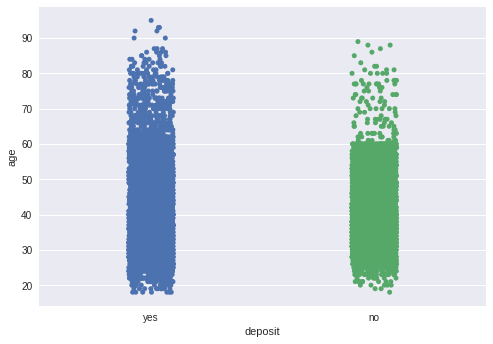

In [ ]:
sns.histplot(x=df['deposit'], y=df['age']);

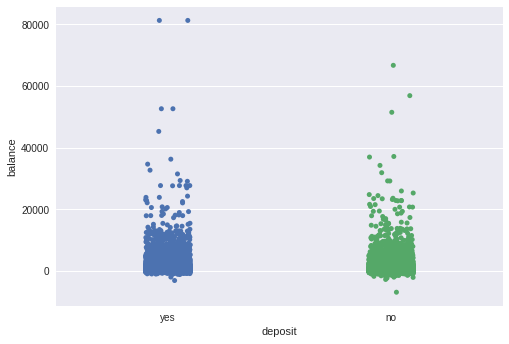

In [ ]:
sns.stripplot(x=df['deposit'], y=df['balance']);

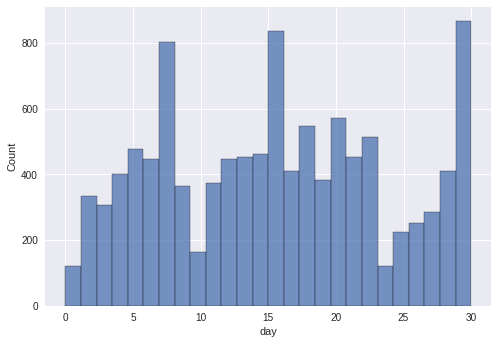

In [ ]:
sns.histplot(df['day'], binrange=(0,30), kde=False);

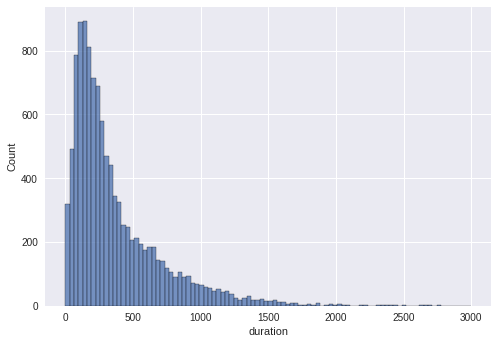

In [ ]:
sns.histplot(df['duration'], binrange=(0,3000), kde=False);

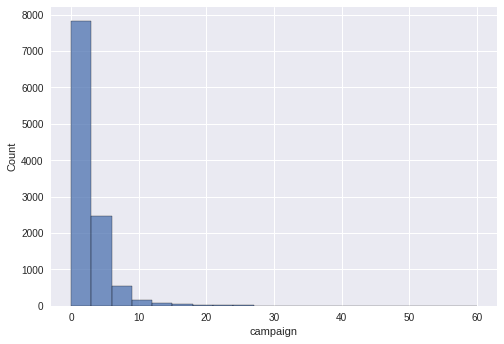

In [ ]:
sns.histplot(df['campaign'], binwidth=3, binrange=(0,60), kde=False);

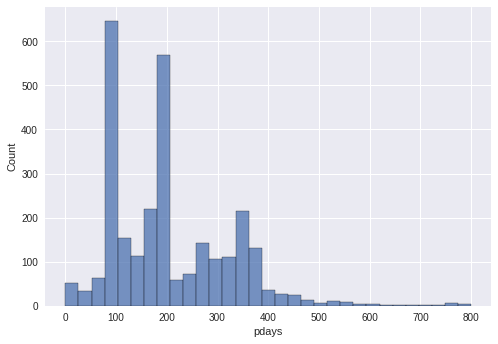

In [ ]:
sns.histplot(df['pdays'], binrange=(0,800), kde=False);

In [1]:
sns.histplot(df['previous'], binrange=(0,60), kde=False);

NameError: ignored

### Correlation Heatmap

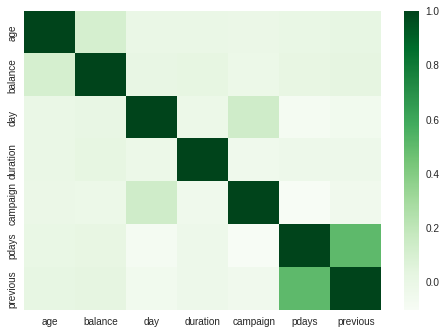

In [ ]:
# Producing heatmap

corr = df.corr()
sns.heatmap(corr, cmap = 'Greens');

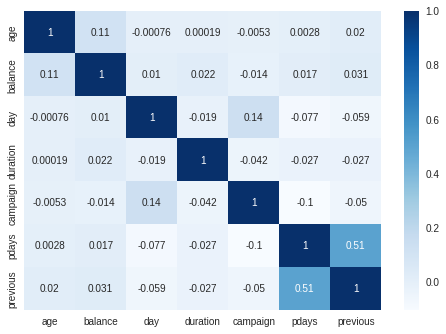

In [ ]:
# Correlation Coefficients Heatmap using annot = True

sns.heatmap(corr, cmap = 'Blues', annot = True);

In [ ]:
# Converting object to numeric values- assigning  no= 0 and yes= 1

df['deposit'] = df['deposit'].replace({'no':0, 'yes':1})

## Machine Learning

### Pre-processing

#### Ordinal Encoding

In [ ]:
# Checking Value Counts for education

df['education'].value_counts()

secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: education, dtype: int64

In [ ]:
# Replacing education values

df['education'].replace({'unknown':0, 'primary':1, 'secondary':2, 'tertiary':3}, inplace=True)
df['education'].value_counts()

2    5476
3    3689
1    1500
0     497
Name: education, dtype: int64

In [ ]:
# Checking dataframe after conversion

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  int64 
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  int64 
dtypes: int64(9), object(8)
memory usage: 1.4+ MB


#### Splitting Dataset

In [ ]:
# Data splitting

y = df['deposit']
X = df.drop(columns = 'deposit')

# Train, Test split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 42)

#### Pipeline

In [ ]:
# Selectors

cat_selector = make_column_selector(dtype_include='object')
num_selector = make_column_selector(dtype_include='number')

In [ ]:
# Select categorical columns

cat_selector(X_train)

['job',
 'marital',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome']

In [ ]:
# Select numerical columns

num_selector(X_train)

['age',
 'education',
 'balance',
 'day',
 'duration',
 'campaign',
 'pdays',
 'previous']

In [ ]:
# Instantiate Scaler

scaler = StandardScaler()

# One-hot encoder

ohe = OneHotEncoder(handle_unknown='ignore', sparse=False)

In [ ]:
# Numeric pipeline

numeric_pipe = make_pipeline(scaler)
numeric_pipe

Pipeline(steps=[('standardscaler', StandardScaler())])

In [ ]:
# Categorical pipeline
categorical_pipe = make_pipeline(ohe)
categorical_pipe

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [ ]:
# Tuples for Column Transformer
number_tuple = (numeric_pipe, num_selector)
category_tuple = (categorical_pipe, cat_selector)

# ColumnTransformer
preprocessor = make_column_transformer(number_tuple, category_tuple)
preprocessor

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a1e089a50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a1e089890>)])

In [ ]:
# fit on train

preprocessor.fit(X_train)

ColumnTransformer(transformers=[('pipeline-1',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a1e089a50>),
                                ('pipeline-2',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f6a1e089890>)])

In [ ]:
# transform train and test

X_train_processed = preprocessor.transform(X_train)
X_test_processed = preprocessor.transform(X_test)

### Create a Model


In [ ]:
# Make an instance of the model

dec_tree = DecisionTreeClassifier(random_state = 42)

In [ ]:
# Training model

dec_tree.fit(X_train_processed, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
# Predict diagnosis

predictions= dec_tree.predict(X_test_processed)

In [ ]:
# calculate classification accuracy

dec_train_score = dec_tree.score(X_train_processed, y_train)
dec_test_score = dec_tree.score(X_test_processed, y_test)
print(dec_train_score)
print(dec_test_score)

1.0
0.7771408097456108


In [ ]:
dec_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 42,
 'splitter': 'best'}

In [ ]:
# actual values what an algorithm should have predicted

y_test.values

array([0, 1, 1, ..., 0, 0, 1])

In [ ]:
# values that the algorithm predicted

predictions

array([0, 1, 1, ..., 0, 0, 0])

In [ ]:
# actual values: y_test.values
# predictions: model predictions

cm = metrics.confusion_matrix(y_test.values, predictions)

In [ ]:
cm

array([[1158,  292],
       [ 330, 1011]])

In [ ]:
cm.shape

(2, 2)

In [ ]:
cm.ravel().shape


(4,)

In [ ]:
# unpacking

tn, fp, fn, tp = cm.ravel() 

In [ ]:
tn

1158

In [ ]:
fp

292

In [ ]:
fn

330

In [ ]:
tp

1011

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


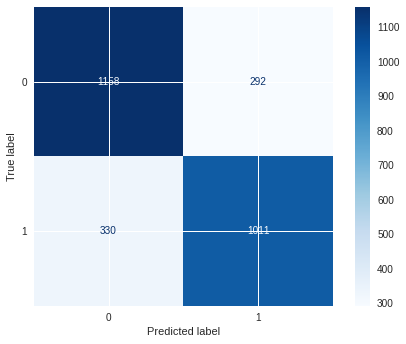

In [ ]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(dec_tree, X_test_processed, y_test, cmap = 'Blues');

### Accuracy = 77.71%

#### Predicted Label= 2791
#### Correction Predictions= 2169






In [ ]:
#get feature importances from the model
headers = ["name", "score"]
values = sorted(zip(X_train_processed.columns, dec_tree.feature_importances_), key=lambda x: x[1] * -1)
dectree_feature_importances = pd.DataFrame(values, columns = headers)

#plot feature importances
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

AttributeError: ignored